In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [124]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 10

In [125]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [126]:
data = pd.read_csv("./data/dataset.csv", encoding="utf_8")

In [127]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
#                                    max_features=n_features,
#                                    stop_words='english')
# tfidf = tfidf_vectorizer.fit_transform(data)

In [128]:
stop_words = set(stopwords.words('english'))
stop_words.update(["coffee", "question","questions","answer"])

In [129]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words=stop_words)
tf = tf_vectorizer.fit_transform(data["Body"])

In [130]:
# nmf = NMF(n_components=n_components, random_state=1,
#           alpha=.1, l1_ratio=.5).fit(tfidf)

In [131]:
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()
# print_top_words(nmf, tfidf_feature_names, n_top_words)

In [132]:
# nmf = NMF(n_components=n_components, random_state=1,
#           beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
#           l1_ratio=.5).fit(tfidf)

In [133]:
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()
# print_top_words(nmf, tfidf_feature_names, n_top_words)

In [134]:
search_params = {'n_components': list(range(5,10)), 'learning_decay': np.arange(0.1, 1, 0.2).tolist()}

In [135]:
# lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
#                                 learning_method='online',
#                                 learning_offset=50.,
#                                 random_state=0)
# lda = LatentDirichletAllocation()

In [136]:
model = GridSearchCV(LatentDirichletAllocation(), param_grid=search_params)

In [137]:
# lda.fit(tf)

In [138]:
model.fit(tf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.1, 0.30000000000000004,
                                            0.5000000000000001,
                                            0.7000000000000001,
                                            0.9000000000000001],
                         'n_components': [5, 6, 7, 8, 9]})

In [139]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.7000000000000001, 'n_components': 5}
Best Log Likelihood Score:  -16040.146491116448
Model Perplexity:  815.0869575801449


In [140]:
model.cv_results_['params']

[{'learning_decay': 0.1, 'n_components': 5},
 {'learning_decay': 0.1, 'n_components': 6},
 {'learning_decay': 0.1, 'n_components': 7},
 {'learning_decay': 0.1, 'n_components': 8},
 {'learning_decay': 0.1, 'n_components': 9},
 {'learning_decay': 0.30000000000000004, 'n_components': 5},
 {'learning_decay': 0.30000000000000004, 'n_components': 6},
 {'learning_decay': 0.30000000000000004, 'n_components': 7},
 {'learning_decay': 0.30000000000000004, 'n_components': 8},
 {'learning_decay': 0.30000000000000004, 'n_components': 9},
 {'learning_decay': 0.5000000000000001, 'n_components': 5},
 {'learning_decay': 0.5000000000000001, 'n_components': 6},
 {'learning_decay': 0.5000000000000001, 'n_components': 7},
 {'learning_decay': 0.5000000000000001, 'n_components': 8},
 {'learning_decay': 0.5000000000000001, 'n_components': 9},
 {'learning_decay': 0.7000000000000001, 'n_components': 5},
 {'learning_decay': 0.7000000000000001, 'n_components': 6},
 {'learning_decay': 0.7000000000000001, 'n_compone

In [141]:
model.cv_results_['mean_test_score']

array([-16088.81735802, -16737.03013989, -17335.8084856 , -17831.10814085,
       -18213.35585241, -16052.42922168, -16707.370391  , -17275.49713373,
       -17862.5200126 , -18327.68965872, -16121.01042319, -16731.41117924,
       -17286.04562407, -17819.08259019, -18319.18198908, -16040.14649112,
       -16759.74506757, -17279.12433038, -17689.24064539, -18272.99744123,
       -16083.89986359, -16734.8968182 , -17155.83324766, -17825.42905949,
       -18203.87285597])

In [142]:
[round(model.cv_results_['mean_test_score'][model.cv_results_['params'].index(gscore)]) for gscore in model.cv_results_['params'] if gscore['learning_decay']==0.2]

[]

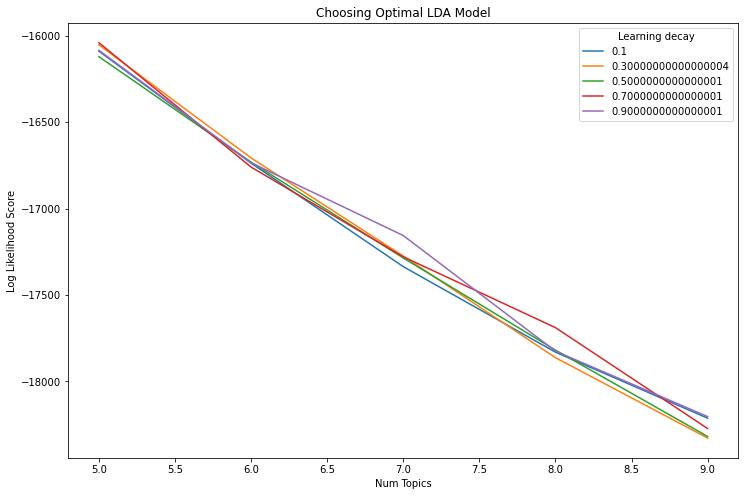

In [143]:
import matplotlib.pyplot as plt
# Get Log Likelyhoods from Grid Search Output
# n_topics = [10, 15, 20, 25, 30]
# log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
# log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
# log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]
log_likelyhoods = {}
plt.figure(figsize=(12, 8))
for decay in search_params['learning_decay']:
    log_likelyhoods = [round(model.cv_results_['mean_test_score'][model.cv_results_['params'].index(gscore)]) for gscore in model.cv_results_['params'] if gscore['learning_decay']==decay]
    plt.plot(search_params['n_components'], log_likelyhoods, label=str(decay))

# Show graph
# plt.figure(figsize=(12, 8))
# plt.plot(n_topics, log_likelyhoods_5, label='0.5')
# plt.plot(n_topics, log_likelyhoods_7, label='0.7')
# plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Score")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [144]:
lda = best_lda_model

In [145]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0: tag wiki flavor one may like brewing edit based post
Topic #1: site think topic se would like answers one meta sites
Topic #2: answers like might people site good think stack new see
Topic #3: site drip one would topic use users think yes answers
Topic #4: tags think beans like tag different could flavor topic equipment



In [146]:
test = tf_vectorizer.transform(
    ["While answering a few of EdChum's questions I discovered that what I/we in the USA call pour over coffee is referred to as drip coffee in the UK. I added the pour-over tag to both questions I encountered but figured we should decide as a community which tag to use to describe this brewing process and then properly document it because drip-coffee means something different in the US (which is apparently referred to as filter-cofee in the UK). For clarification the method in question is shown in the image below. ",
    "Being newly created we have zero feeds appearing in our main chat right now. What blogs, news sites, or other important coffee related things should appear in our main chat room's feed? Post your suggestions/submissions.  "])

In [147]:
doc_topic_dist_unnormalized = np.matrix(lda.transform(tf))

In [148]:
doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)

In [149]:
print(doc_topic_dist.argmax(axis=1))

[[1]
 [2]
 [2]
 [1]
 [1]
 [3]
 [4]
 [1]
 [2]
 [1]
 [4]
 [2]
 [3]
 [0]
 [1]
 [0]
 [1]
 [1]
 [4]
 [0]
 [0]
 [3]
 [1]
 [4]
 [1]
 [3]
 [4]
 [0]
 [4]
 [4]
 [1]
 [2]
 [0]
 [1]
 [0]
 [2]
 [3]
 [3]
 [1]
 [4]
 [4]
 [0]
 [4]
 [4]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [0]
 [1]
 [3]
 [1]
 [4]
 [3]
 [0]
 [2]
 [0]
 [4]
 [1]
 [1]
 [0]
 [2]
 [4]
 [1]
 [4]
 [1]
 [1]
 [3]
 [3]
 [1]
 [4]
 [4]
 [4]
 [4]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [3]
 [2]
 [4]
 [0]
 [2]
 [4]
 [1]
 [1]
 [1]
 [3]
 [1]
 [2]
 [4]
 [1]
 [2]
 [2]
 [3]
 [0]
 [3]
 [2]
 [2]
 [3]
 [1]
 [2]
 [2]
 [2]
 [4]
 [2]
 [1]
 [1]
 [1]
 [4]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [1]
 [2]
 [1]
 [3]
 [3]
 [1]
 [0]
 [2]
 [3]
 [3]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]
 [2]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [4]
 [1]
 [1]
 [3]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [3]
 [1]
 [0]
 [2]
 [3]
 [3]
 [3]
 [1]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [4]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [4]
 [4]
 [0]
 [1]
 [4]
 [4]
 [1]
 [1]
 [1]
 [1]
 [0]


In [150]:
topics = []
for n in doc_topic_dist.argmax(axis=1):
    topics.append(n[0,0])
print(topics)

[1, 2, 2, 1, 1, 3, 4, 1, 2, 1, 4, 2, 3, 0, 1, 0, 1, 1, 4, 0, 0, 3, 1, 4, 1, 3, 4, 0, 4, 4, 1, 2, 0, 1, 0, 2, 3, 3, 1, 4, 4, 0, 4, 4, 2, 1, 2, 2, 2, 2, 3, 0, 1, 3, 1, 4, 3, 0, 2, 0, 4, 1, 1, 0, 2, 4, 1, 4, 1, 1, 3, 3, 1, 4, 4, 4, 4, 1, 2, 2, 1, 1, 1, 3, 2, 4, 0, 2, 4, 1, 1, 1, 3, 1, 2, 4, 1, 2, 2, 3, 0, 3, 2, 2, 3, 1, 2, 2, 2, 4, 2, 1, 1, 1, 4, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 3, 3, 1, 0, 2, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 4, 1, 1, 3, 1, 2, 1, 2, 0, 0, 3, 1, 0, 2, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 1, 1, 4, 0, 1, 1, 0, 0, 0, 2, 4, 4, 0, 1, 4, 4, 1, 1, 1, 1, 0, 4, 2, 4, 1, 3, 4, 1, 0, 4, 3, 0, 0, 2, 1, 2, 3, 1, 0, 1, 1, 2, 2, 1, 4, 3, 3, 0, 0, 1, 1]


In [151]:
print("Log Likelihood: ", lda.score(tf))

Log Likelihood:  -59974.37861108882


In [152]:
print("Perplexity: ", lda.perplexity(tf))

Perplexity:  815.0869575801449


In [153]:
data['Topic']=pd.DataFrame(topics)

In [154]:
data

,Id,ParentId,PostTypeId,CreationDate,Title,Body,Topic
0,1,NaN,1,2015-01-27T21:23:05.507,Should we describe the process of brewing a si...,While answering a few of EdChum's questions I ...,1
1,2,NaN,1,2015-01-27T21:26:10.227,What should go in our main chat feeds?,Being newly created we have zero feeds appeari...,2
2,3,1.0,2,2015-01-27T21:30:20.953,NaN,"It looks like filter coffee has another, diffe...",2
3,4,NaN,1,2015-01-27T22:31:45.837,Let's think of a creative name for our chatroom,"The chatroom name is so bland. ""Coffee."" Look ...",1
4,5,NaN,1,2015-01-27T22:34:21.017,Should product recommendations be on-topic?,"On most SE sites, product recommendations are ...",1
...,...,...,...,...,...,...,...
225,1234,1233.0,2,2020-01-24T17:38:53.693,NaN,I see no reason why a different rule should ap...,3
226,1235,NaN,5,2020-04-24T13:33:15.850,NaN,This tag is used by staff when sharing concept...,0
227,1236,NaN,4,2020-04-24T13:33:15.850,product-discovery,Indicates that the post shares product or conf...,0
228,1237,NaN,1,2020-06-03T08:54:22.113,Do we accept or close recipe requests?,Seasoned Advice has excluded recipe requests f...,1


In [155]:
data.to_csv("./data/dataset_sklearn_LDA.csv", encoding="utf_8")

In [171]:
topic_words = {}
for topic_idx, topic in enumerate(lda.components_):
        topic_words["Topic " + str(topic_idx)] = [tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
print(topic_words)

{'Topic 0': ['tag', 'wiki', 'flavor', 'one', 'may', 'like', 'brewing', 'edit', 'based', 'post'], 'Topic 1': ['site', 'think', 'topic', 'se', 'would', 'like', 'answers', 'one', 'meta', 'sites'], 'Topic 2': ['answers', 'like', 'might', 'people', 'site', 'good', 'think', 'stack', 'new', 'see'], 'Topic 3': ['site', 'drip', 'one', 'would', 'topic', 'use', 'users', 'think', 'yes', 'answers'], 'Topic 4': ['tags', 'think', 'beans', 'like', 'tag', 'different', 'could', 'flavor', 'topic', 'equipment']}


In [172]:
topic_top_words = pd.DataFrame(topic_words)

In [173]:
topic_top_words

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,tag,site,answers,site,tags
1,wiki,think,like,drip,think
2,flavor,topic,might,one,beans
3,one,se,people,would,like
4,may,would,site,topic,tag
5,like,like,good,use,different
6,brewing,answers,think,users,could
7,edit,one,stack,think,flavor
8,based,meta,new,yes,topic
9,post,sites,see,answers,equipment


In [174]:
topic_top_words.to_csv("./data/lda_topic_tops_words.csv", encoding="utf_8")

In [175]:
simularity = np.asarray(np.asmatrix(tf) * np.asmatrix(tf).T)
pd.DataFrame(similarity,index=data["Body"], columns=data["Body"]).head(10)

ValueError: dimension mismatch